In [1]:
import sys, os
sys.path.append("./dataset")

import numpy as np
import pickle
from dataset.mnist import load_mnist

In [2]:
(train_image_data, train_label_data), (test_image_data, test_label_data) = load_mnist(flatten = True, normalize = False)

In [3]:
print(train_image_data.shape)
print(train_label_data.shape)
print(test_image_data.shape)
print(test_label_data.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
image = train_image_data[0]
image.shape

(784,)

In [5]:
image_reshaped = image.reshape(28, 28)
image_reshaped.shape

(28, 28)

In [6]:
import matplotlib.pylab as plt
label = train_label_data[0]
plt.figure(figsize = (4, 4))
plt.title("sample of " + str(label))
plt.imshow(image_reshaped, cmap="gray")
plt.show()

<Figure size 400x400 with 1 Axes>

In [7]:
import matplotlib.pylab as plt
def mnist_show(n) :
    image = train_image_data[n]
    image_reshaped = image.reshape(28, 28)
    image_reshaped.shape
    label = train_label_data[n]
    plt.figure(figsize = (4, 4))
    plt.title("sample of " + str(label))
    plt.imshow(image_reshaped, cmap="gray")
    plt.show()

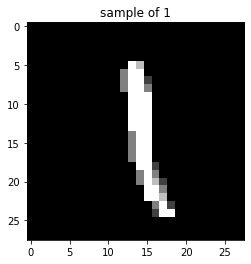

In [8]:
mnist_show(2747)

In [9]:
def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def softmax(matrix) :
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    return y

def get_data():
    (image_train, label_train), (image_test, label_test) = load_mnist(flatten=True, normalize=False)
    return image_test, label_test

def init_network() :
    with open('./dataset/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x) :
    # hidden data 2개
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [10]:
images, labels = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(images)) :
    y = predict(network, images[i]) #output 10개를 가져온다(0~9 10개의 수에 대한 확률)
    p = np.argmax(y) # 가장 가능성이 높은 p를 추출
    if p == labels[i] : # 실제 값과 비교하여 카운트
        accuracy_cnt += 1
    
print("Accuracy: " + str(float(accuracy_cnt) / len(images)))

#output이 0개가 되는 과정
# 1 * 784, 784 * 50, 50 * 100, 100 * 10  => 1 * 10

Accuracy: 0.9207


In [11]:
#배치처리
images, labels = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(images), batch_size) :
    x_batch = images[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == labels[i:i+batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt) / len(images)) )

Accuracy: 0.9207


In [12]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [13]:
mean_squared_error(np.array(y), np.array(true))

0.09750000000000003

In [15]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(true))

0.5975

In [16]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) # delta가 있는 이유: log 0 = -무한대 이므로, 이를 방지하기 위함

In [17]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [18]:
cross_entropy_error(np.array(y), np.array(true))

0.510825457099338

In [20]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(true))

2.302584092994546

In [23]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [25]:
train_size  = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [29]:
np.random.choice(60000, 10)

array([ 3857, 59803, 34274, 14334, 40601, 54381, 17974, 52960,  7306,
       42005])

In [32]:
#one hot이 입력값으로 들어올 경우
def cross_entropy_error_one_hot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y))

In [34]:
#label이 입력값으로 들어올 경우
def cross_entropy_error_label(y, t) :
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    
    #one hot 형태로 반환
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

## 미분

In [37]:
def numerical_differential(f, x) :
    h = 1e-4
    return ((f(x + h) - f(x - h)) / (2 * h))

In [44]:
def function_1(x):
    return 0.01*(x**2) + 0.2*x

In [45]:
numerical_differential(function_1, 5)

0.2999999999986347

In [46]:
numerical_differential(function_1, 10)

0.40000000000040004

In [47]:
# 편미분
def function_2(x) :
    return x[0] ** 2 + x[1] ** 2

In [55]:
def function_3(x) :
    return x*x + 4**2

In [56]:
def function_4(x) :
    return 3**2 + x*x

In [57]:
numerical_differential(function_3, 3)

6.00000000000378

In [58]:
numerical_differential(function_4, 4)

7.999999999999119

In [64]:
def numerical_gradient(f, x) :
    h = 1e-4
    grad = np.zeros_like(x)
    
    for index in range(x.size) : #x의 size는 독립변수의 개수를 의미
        tmp_val = x[index]
        x[index] = tmp_val + h #x의 한 독립변수를 약간 증가했을 때
        fxh1 = f(x)             #그 상태를 저장한다
        
        x[index] = tmp_val - h #그 독립변수를 약간 감소시켰을 때
        fxh2 = f(x)            #그 상태를 또 저장한다
        
        grad[index] = (fxh1 - fxh2) / (2*h) # 그 독립변수에 대한 기울기를 저장한다
        x[index] = tmp_val                  #그 독립변수를 감소했던 것을 되돌린다
        
    return grad

In [74]:
#기울기가 적게끔 매개변수를 변경해야 함
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [75]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [77]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [91]:
#step num과 lr을 늘여보고 줄여보면서 최적화된 값이 나오도록 한다

def gradient_descent(f, init_x, lr=0.01, step_num = 100) : # lr = learning rate: 학습률
    x = init_x
    x_history = []
    
    for i in range(step_num) :
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
        print(x)
    return x, np.array(x_history)

In [101]:
init_x = np.array([500.0, 500.0])
lr = 0.1
step_num = 250
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
print(x)

[400.00000002 400.00000002]
[320.00000007 320.00000007]
[256.00000007 256.00000007]
[204.80000007 204.80000007]
[163.84000005 163.84000005]
[131.07200004 131.07200004]
[104.85760003 104.85760003]
[83.88608002 83.88608002]
[67.10886402 67.10886402]
[53.68709121 53.68709121]
[42.94967297 42.94967297]
[34.35973838 34.35973838]
[27.4877907 27.4877907]
[21.99023256 21.99023256]
[17.59218605 17.59218605]
[14.07374884 14.07374884]
[11.25899907 11.25899907]
[9.00719926 9.00719926]
[7.20575941 7.20575941]
[5.76460752 5.76460752]
[4.61168602 4.61168602]
[3.68934882 3.68934882]
[2.95147905 2.95147905]
[2.36118324 2.36118324]
[1.88894659 1.88894659]
[1.51115727 1.51115727]
[1.20892582 1.20892582]
[0.96714066 0.96714066]
[0.77371252 0.77371252]
[0.61897002 0.61897002]
[0.49517602 0.49517602]
[0.39614081 0.39614081]
[0.31691265 0.31691265]
[0.25353012 0.25353012]
[0.2028241 0.2028241]
[0.16225928 0.16225928]
[0.12980742 0.12980742]
[0.10384594 0.10384594]
[0.08307675 0.08307675]
[0.0664614 0.0664614

In [188]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

def numerical_gradient(f, x) :
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        it.iternext()
        
    return grad

In [189]:
class simpleNet :
    def __init__(self) :
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [190]:
net = simpleNet()
print(net.W)

[[-0.06433458  0.75626655 -0.51066919]
 [ 1.57636072 -1.21827724  1.56343071]]


In [191]:
x = np.array([0.6, 0.9]) # 0.6과 0.9는 예측값
p = net.predict(x)
print(p)

[ 1.38012391 -0.64268959  1.10068613]


In [192]:
np.argmax(p) # p 값들 중에서 몇 번째에 있는 것이 가장 높은지

0

In [193]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.9152159145926789

In [194]:
def f(W):
    return net.loss(x, t)

In [195]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.31771381  0.0420294  -0.35973323]
 [ 0.47657072  0.0630451  -0.53959337]]


In [196]:
f = lambda w : net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.31771381  0.0420294  -0.35973323]
 [ 0.47657072  0.0630451  -0.53959337]]


In [197]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [198]:
def relu(x):
    return np.maximum(0, x)

In [199]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [200]:
def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad

In [201]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [202]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [203]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))

In [204]:
def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

In [205]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        self.count = 0
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    def loss(self, x, t):
        y = self.predict(x)
        
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        #forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        #backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis = 0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)
        
        return grads

In [206]:
net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [207]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [208]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [209]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

net.numerical_gradient(x, t)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'